In [3]:
import qiskit

In [4]:
qiskit.__version__

'1.3.2'

In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum",
                               token='8d01e74c63c75654f2dfecada91ab8e75ad2efad41d1d1193a5b71a3e6aec099c38ef3b4d7b981e2016bf7c3f9bed0c7f011afecc29560caae873b09bd24643a')

In [6]:
QiskitRuntimeService.save_account(channel='ibm_quantum', token='8d01e74c63c75654f2dfecada91ab8e75ad2efad41d1d1193a5b71a3e6aec099c38ef3b4d7b981e2016bf7c3f9bed0c7f011afecc29560caae873b09bd24643a')

AccountAlreadyExistsError: 'Named account (default-ibm-quantum) already exists. Set overwrite=True to overwrite.'

In [7]:
backend = service.backend(name='ibm_brisbane')

Hello World as Bell State test

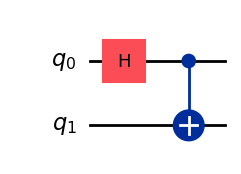

In [8]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)
qc.draw(output='mpl')

In [1]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ, ZI, IZ, XX, XI, IZ]

In [9]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc] * len(observables), observables)

job.result()

EstimatorResult(values=array([1.        , 0.02539062, 0.02539062, 1.        , 0.00195312,
       0.02539062]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.000332625, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'device': 'CPU', 'time_taken': 0.000583125, 'measure_sampling': True, 'num_clbits': 2, 'max_memory_mb': 16384, 'input_qubit_map': [[1, 1], [0, 0]], 'num_qubits': 2, 'method': 'stabilizer', 'required_memory_mb': 0, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9993553161621094, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.000332625, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1],

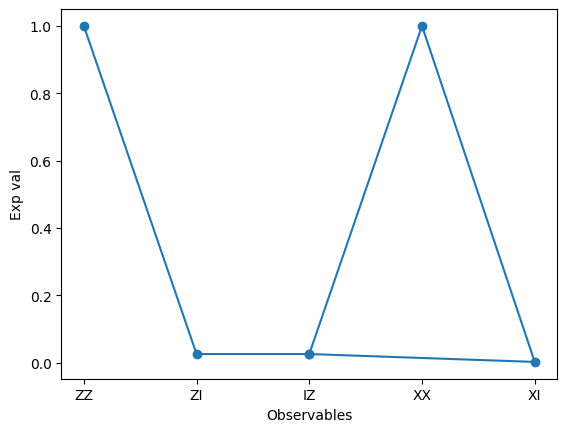

In [10]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IZ']

values = job.result().values

plt.plot(data, values, '-o')

plt.xlabel('Observables')
plt.ylabel('Exp val')

plt.show()

Extend Hello World as n qubits GHZ.